In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math

In [15]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


In [16]:
# loading data using pandas
df = pd.read_csv("D:/Trimister-2/Team projectA/busfires/BushFire_weather.csv")

In [64]:
df.head()


,Unnamed: 0,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,0,-37.23460,145.90694,336.4,0.4,0.44,29-01-2020,03:42,1,low,...,11,8,0,62,0.0,1016,11,10,136,4
1,1,-37.39335,145.89616,337.8,0.4,0.37,16-03-2020,04:00,1,nominal,...,4,11,5,82,0.0,1026,5,10,112,5
2,2,-37.39185,145.89191,300.7,0.4,0.37,16-03-2020,15:18,1,nominal,...,19,5,7,36,0.0,1024,19,10,262,4
3,3,-37.38438,145.90166,342.7,0.4,0.44,17-03-2020,03:42,1,nominal,...,9,6,13,76,0.0,1026,9,10,79,3
4,4,-37.38489,145.89644,353.6,0.4,0.44,17-03-2020,03:42,1,nominal,...,9,6,13,76,0.0,1026,9,10,79,3


In [27]:
df1= df[["Sub Urban_x","State","WindChillC","cloudcover","humidity","precipMM","pressure","tempC","windspeedKmph","frp"]]
df1.head()

,Sub Urban_x,State,WindChillC,cloudcover,humidity,precipMM,pressure,tempC,windspeedKmph,frp
0,Alexandra,Victoria,11,0,62,0.0,1016,11,4,2.5
1,Alexandra,Victoria,4,5,82,0.0,1026,5,5,6.7
2,Alexandra,Victoria,19,7,36,0.0,1024,19,4,1.2
3,Alexandra,Victoria,9,13,76,0.0,1026,9,3,16.4
4,Alexandra,Victoria,9,13,76,0.0,1026,9,3,13.8


In [28]:
#considering for victoria region only
df1 = df1[df1.State =="Victoria"]

In [30]:
#checking the count of the variable State
df1.groupby(["State"]).count()

,Sub Urban_x,WindChillC,cloudcover,humidity,precipMM,pressure,tempC,windspeedKmph,frp
State,,,,,,,,,
Victoria,20138,20138,20138,20138,20138,20138,20138,20138,20138


In [32]:

display(df1.isnull().any())

Sub Urban_x      False
State            False
WindChillC       False
cloudcover       False
humidity         False
precipMM         False
pressure         False
tempC            False
windspeedKmph    False
frp              False
dtype: bool

In [33]:
display(df1.head())

,Sub Urban_x,State,WindChillC,cloudcover,humidity,precipMM,pressure,tempC,windspeedKmph,frp
0,Alexandra,Victoria,11,0,62,0.0,1016,11,4,2.5
1,Alexandra,Victoria,4,5,82,0.0,1026,5,5,6.7
2,Alexandra,Victoria,19,7,36,0.0,1024,19,4,1.2
3,Alexandra,Victoria,9,13,76,0.0,1026,9,3,16.4
4,Alexandra,Victoria,9,13,76,0.0,1026,9,3,13.8


,WindChillC,cloudcover,humidity,precipMM,pressure,tempC,windspeedKmph,frp
WindChillC,1.000000,-0.507299,-0.850367,-0.223287,-0.288587,0.995022,0.213503,0.096552
cloudcover,-0.507299,1.000000,0.416792,0.390412,-0.120256,-0.473170,0.139222,-0.069310
humidity,-0.850367,0.416792,1.000000,0.227691,0.310386,-0.867976,-0.321419,-0.100425
precipMM,-0.223287,0.390412,0.227691,1.000000,-0.338770,-0.198145,0.220293,-0.043398
pressure,-0.288587,-0.120256,0.310386,-0.338770,1.000000,-0.328581,-0.350012,-0.066503
tempC,0.995022,-0.473170,-0.867976,-0.198145,-0.328581,1.000000,0.278596,0.100989
windspeedKmph,0.213503,0.139222,-0.321419,0.220293,-0.350012,0.278596,1.000000,-0.043449
frp,0.096552,-0.069310,-0.100425,-0.043398,-0.066503,0.100989,-0.043449,1.000000


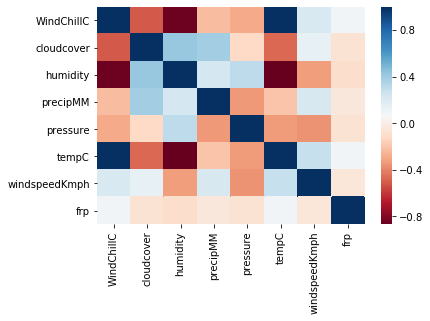

In [38]:
#check for multi collienarity
corr =df1.corr()
#display of correlation matrix
display(corr)

#display of correlation heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")

from the above heat map we can able to say there is a relation between windChillC and tempC so we are dropping windchill as tempC is better comparision for FRP

In [44]:
df2 = df1.drop(["WindChillC"],axis=1)

In [45]:
df2.head()

,Sub Urban_x,State,cloudcover,humidity,precipMM,pressure,tempC,windspeedKmph,frp
0,Alexandra,Victoria,0,62,0.0,1016,11,4,2.5
1,Alexandra,Victoria,5,82,0.0,1026,5,5,6.7
2,Alexandra,Victoria,7,36,0.0,1024,19,4,1.2
3,Alexandra,Victoria,13,76,0.0,1026,9,3,16.4
4,Alexandra,Victoria,13,76,0.0,1026,9,3,13.8


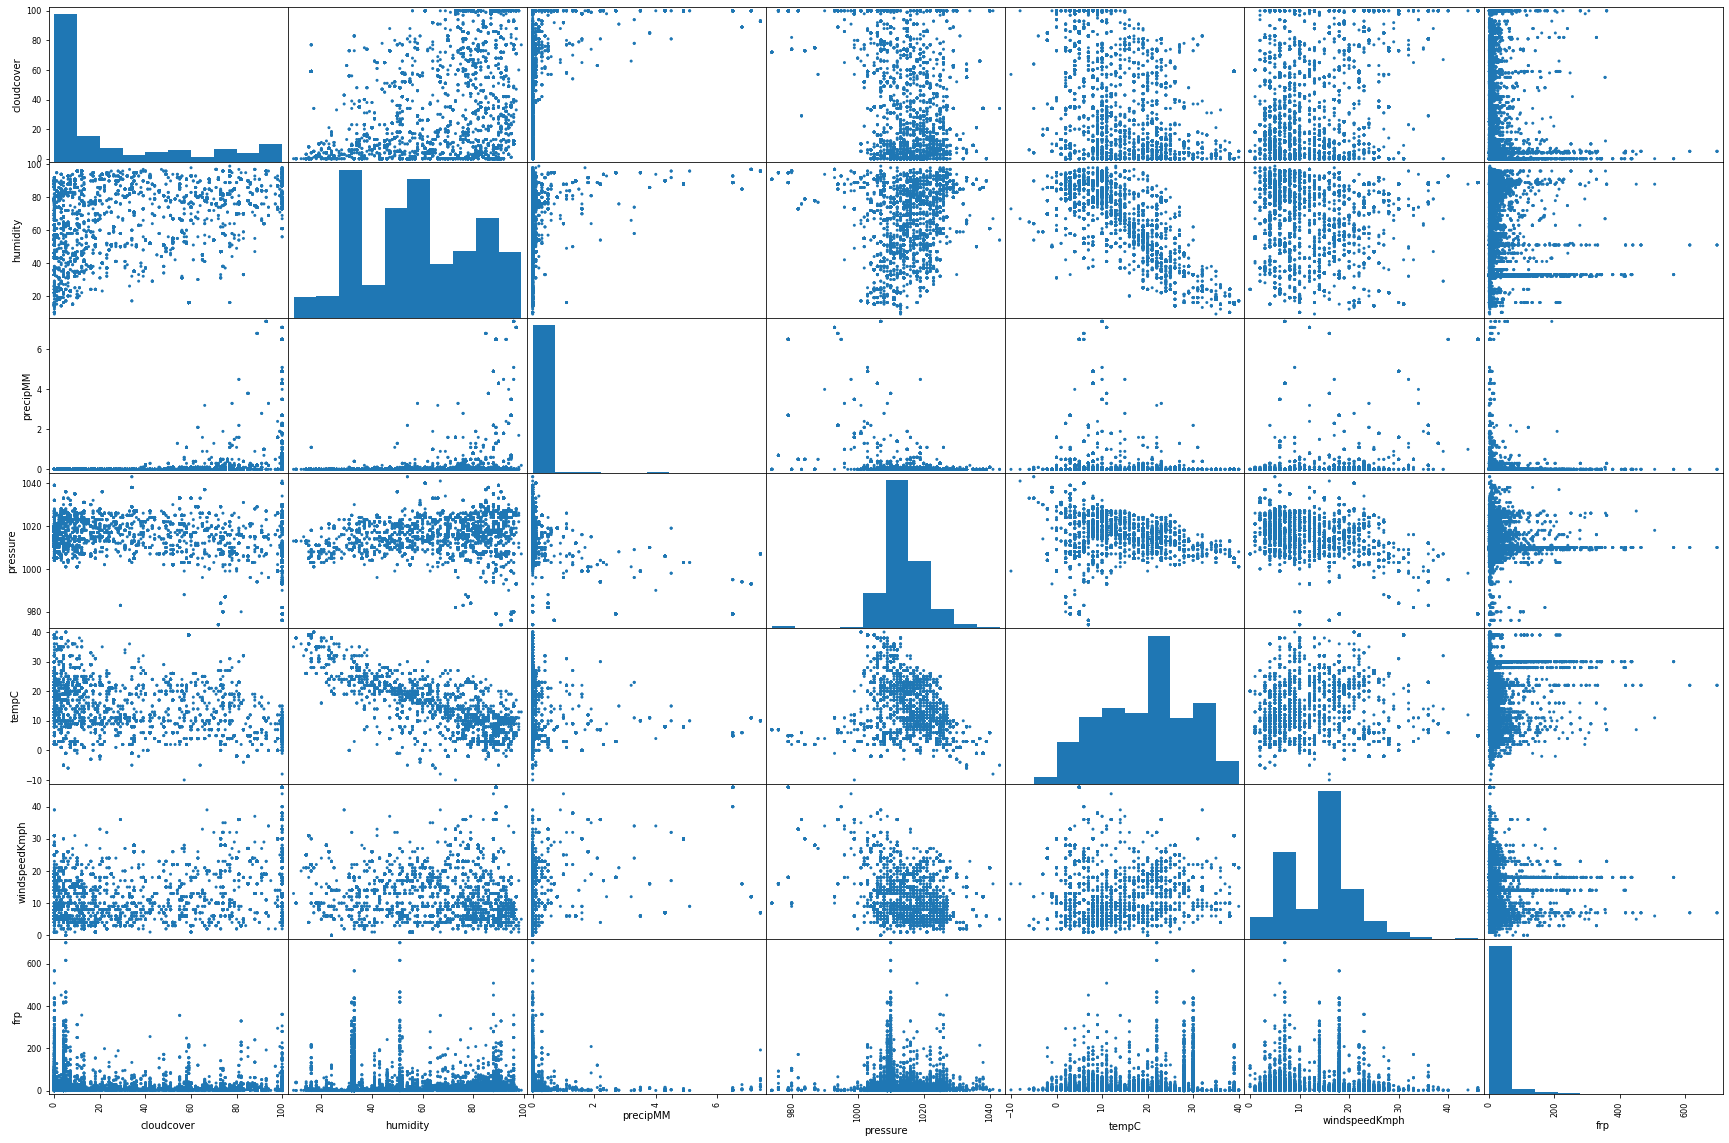

In [46]:
# define the plot
pd.plotting.scatter_matrix(df2, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

In [47]:
df2.describe()

,cloudcover,humidity,precipMM,pressure,tempC,windspeedKmph,frp
count,20138.000000,20138.000000,20138.000000,20138.000000,20138.000000,20138.000000,20138.000000
mean,23.478151,57.466531,0.116293,1013.371338,19.073245,14.250720,18.656426
std,32.154137,21.849742,0.650967,7.093671,9.490886,6.727188,43.010523
min,0.000000,9.000000,0.000000,974.000000,-10.000000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,1010.000000,11.000000,8.000000,2.500000
50%,5.000000,56.000000,0.000000,1013.000000,21.000000,15.000000,5.900000
75%,40.000000,78.000000,0.000000,1017.000000,27.000000,18.000000,14.500000
max,100.000000,99.000000,7.400000,1043.000000,40.000000,46.000000,698.900000


In [48]:

# get the summary
desc_df2 = df2.describe()

# add the standard deviation metric
desc_df2.loc['+3_std'] = desc_df2.loc['mean'] + (desc_df2.loc['std'] * 3)
desc_df2.loc['-3_std'] = desc_df2.loc['mean'] - (desc_df2.loc['std'] * 3)

# display it
desc_df2

,cloudcover,humidity,precipMM,pressure,tempC,windspeedKmph,frp
count,20138.000000,20138.000000,20138.000000,20138.000000,20138.000000,20138.000000,20138.000000
mean,23.478151,57.466531,0.116293,1013.371338,19.073245,14.250720,18.656426
std,32.154137,21.849742,0.650967,7.093671,9.490886,6.727188,43.010523
min,0.000000,9.000000,0.000000,974.000000,-10.000000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,1010.000000,11.000000,8.000000,2.500000
50%,5.000000,56.000000,0.000000,1013.000000,21.000000,15.000000,5.900000
75%,40.000000,78.000000,0.000000,1017.000000,27.000000,18.000000,14.500000
max,100.000000,99.000000,7.400000,1043.000000,40.000000,46.000000,698.900000
+3_std,119.940561,123.015757,2.069195,1034.652350,47.545903,34.432284,147.687994
-3_std,-72.984259,-8.082695,-1.836609,992.090326,-9.399414,-5.930844,-110.375142


In [51]:
#removing suburb and state
df2 =df2.drop(["State","Sub Urban_x"],axis=1)

In [52]:
# filter the data frame to remove the values exceeding 3 standard deviations
econ_remove_df = df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]

# what rows were removed
df2.index.difference(econ_remove_df.index)

Int64Index([    43,     44,     48,     50,     52,     53,  13169,  13170,
             13190,  13198,
            ...
            479457, 479461, 479554, 488104, 519373, 523617, 523656, 532853,
            532884, 532885],
           dtype='int64', length=1101)

In [53]:

# define our input variable (X) & output variable


X = df2.drop('frp', axis = 1)
Y = df2[['frp']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:

# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 501.2
----------------------------------------------------------------------------------------------------
The Coefficient for cloudcover is -0.02
The Coefficient for humidity is -0.13
The Coefficient for precipMM is -1.8
The Coefficient for pressure is -0.46
The Coefficient for tempC is 0.17
The Coefficient for windspeedKmph is -0.57


In [55]:

# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[17.75867104],
       [24.23001287],
       [22.46757064],
       [18.56227082],
       [16.21896466]])

evaluating the model

In [56]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

C:\Users\kiran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


meausre of error

In [57]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.73e+03
MAE 20.5
RMSE 41.6


R-squared value

In [58]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.018


In [60]:
dataframe = df2
array = dataframe.values

In [62]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
dataframe = df2

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

LR: nan (nan)
LDA: nan (nan)
KNN: nan (nan)
CART: nan (nan)


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: (array([0.000e+00, 1.000e-01, 2.000e-01, 3.000e-01, 4.000e-01, 5.000e-01,
       6.000e-01, 7.000e-01, 8.000e-01, 9.000e-01, 1.000e+00, 1.100e+00,
       1.200e+00, 1.300e+00, 1.400e+00, 1.500e+00, 1.600e+00, 1.700e+00,
       1.800e+00, 1.900e+00, 2.000e+00, 2.100e+00, 2.200e+00, 2.300e+00,
       2.400e+00, 2.500e+00, 2.600e+00, 2.700e+00, 2.800e+00, 2.900e+00,
       3.000e+00, 3.100e+00, 3.200e+00, 3.300e+00, 3.400e+00, 3.500e+00,
       3.600e+00, 3.700e+00, 3.800e+00, 3.900e+00, 4

NB: nan (nan)
SVM: nan (nan)


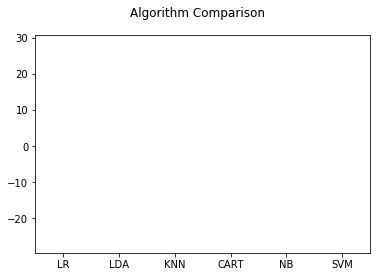

In [63]:

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()